In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as sps
from tqdm import tqdm
rng = np.random.default_rng()

In [2]:
from graph import RandomGraph, plot_trajectories

In [3]:
%load_ext autoreload
%autoreload 2

В этой части работы $H_i \sim \mathcal{N}(0, \Sigma)$, а все внедиагональные элементы матрицы ковариаций $\Sigma$ равны одному и тому же фиксированному числу $\beta$. Посмотрим на динамику систем с различными топологиями сети:
* полный граф
* граф-звёздочка
* кольцо
* бинарное дерево
* регулярный граф степени 3

Конечно, возможных топологий очень много. Можно было попробовать работать с $k$-дольными графами, произвольными деревьями, графом-бабочкой, кактусами и т.д., но для начала посмотрим на перечисленные выше.

Для разных графов придётся выбирать разной константу связи $J$: нужно, чтобы величина $J \cdot \sum\limits_{i: (i, j) \in E} \sigma_i$, отвечающая взаимодействию, совпадала по порядку с величиной собственного поля, которое оказывается в основном из $[-1, 1]$.

## Полный граф

In [44]:
N = 5000
J = 0.0003
G_complete = RandomGraph(N, topology='complete')

In [28]:
beta_grid = np.array([0, 0.25, 0.5, 0.7, 0.9])
H_max = 4
H_grid = np.linspace(-H_max, H_max, 400)

5it [11:00, 132.00s/it]


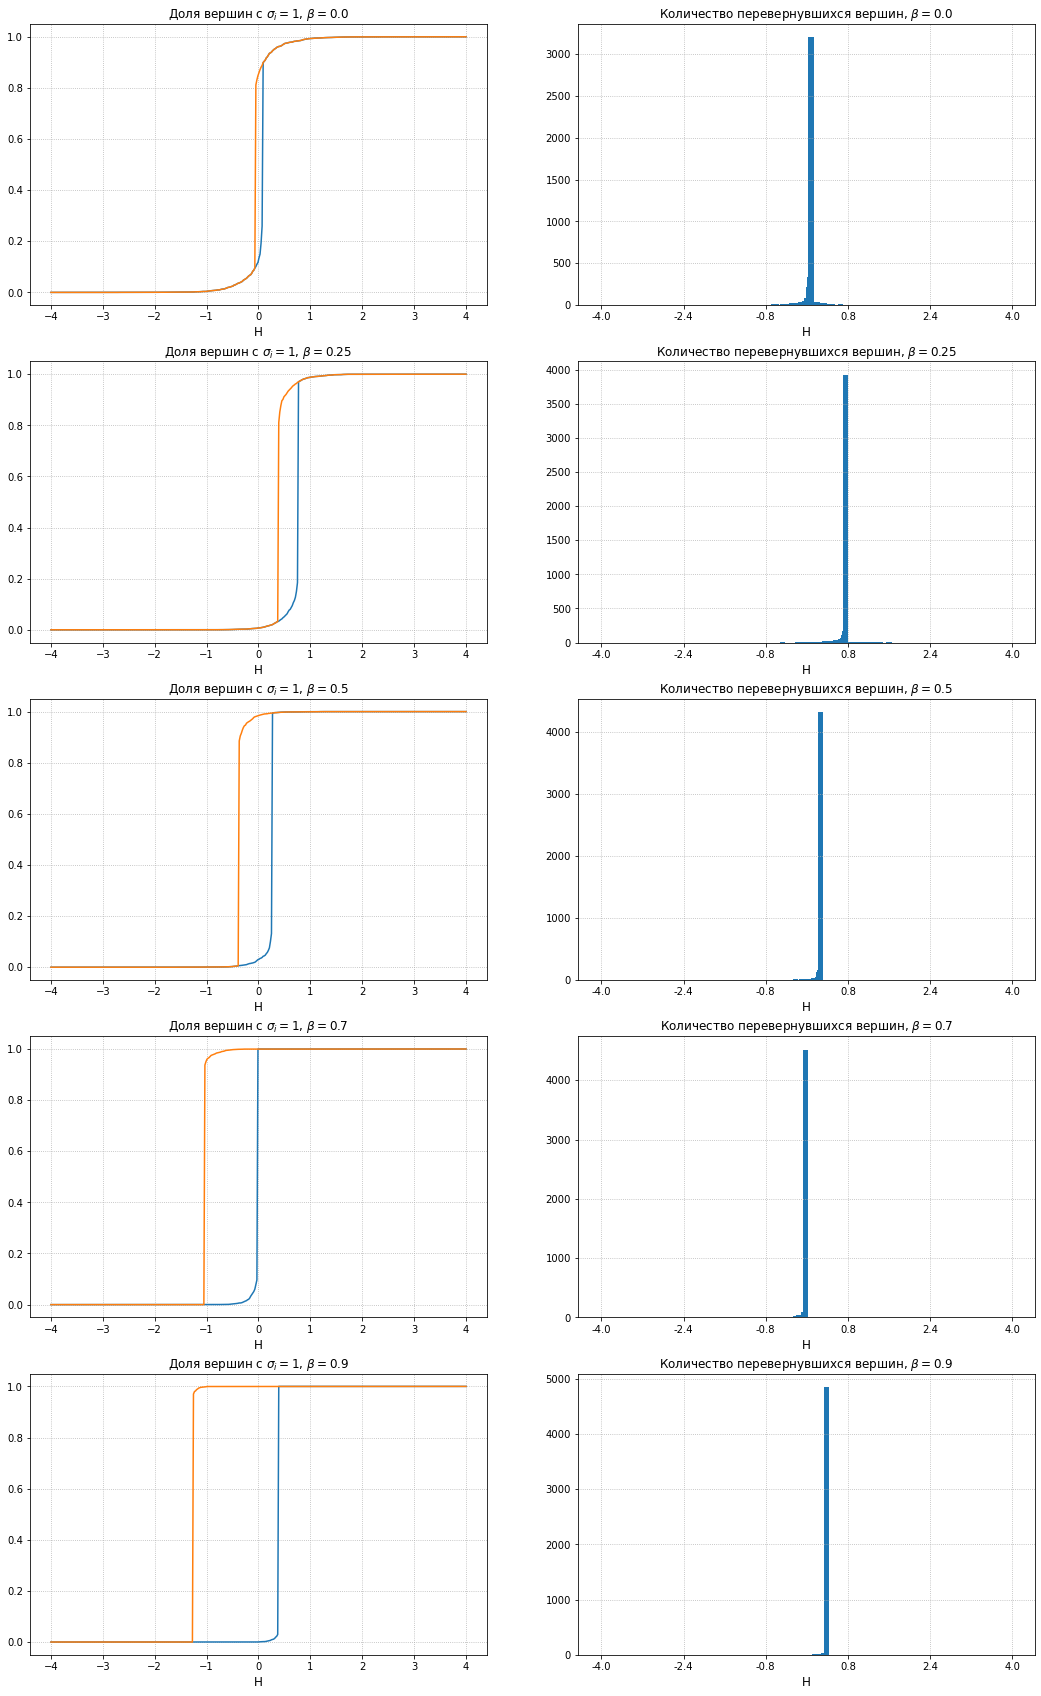

In [46]:
plt.figure(figsize=(18, 30))
for index, beta in tqdm(enumerate(beta_grid)):
    low_to_high, high_to_low, hubs_low, hubs_high = G_complete.get_trajectories(J, H_grid, beta, 
                                                                                'multivariate_norm', True,
                                                                                matrix='simple')
    plot_trajectories(index, beta, H_grid, low_to_high, high_to_low, hubs_low, hubs_high)

Довольно хорошо видно, что петля гистерезиса постепенно расширяется, превращаясь в конце концов в прямоугольник, и её границы становятся более резкими. На гистограмме это соответствует увеличению высоты пика и практически полному исчезновению столбиков около него.

## Граф-звёздочка

In [48]:
N = 2000
J = 1
G_star = RandomGraph(N, topology='star')

5it [03:05, 37.20s/it]


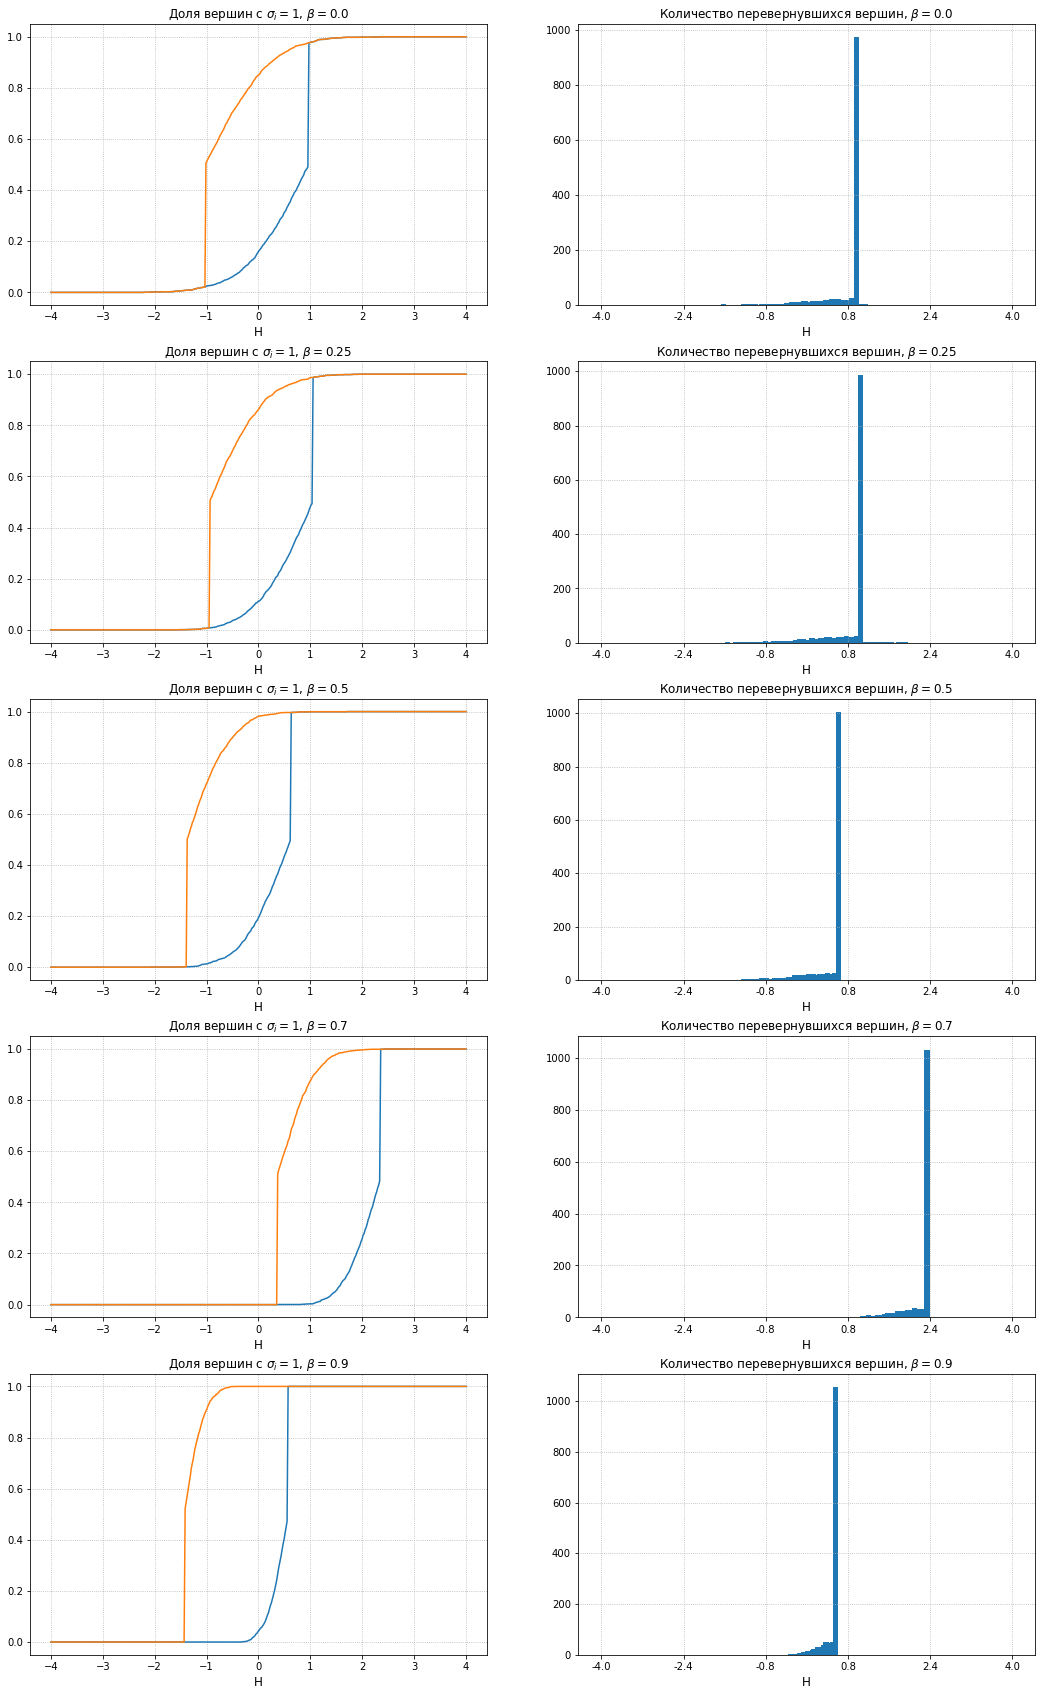

In [49]:
plt.figure(figsize=(18, 30))
for index, beta in tqdm(enumerate(beta_grid)):
    low_to_high, high_to_low, hubs_low, hubs_high = G_star.get_trajectories(J, H_grid, beta, 
                                                                            'multivariate_norm', True,
                                                                            matrix='simple')
    plot_trajectories(index, beta, H_grid, low_to_high, high_to_low, hubs_low, hubs_high)

Здесь ситуация особенная, связанная, конечно, с наличием одной главной вершины и множества подчинённых. На каждом графике видно, как около половины подчинённых вершин меняют своё состояние, после чего переворачивается-таки главная вершина, моментально увлекая за собою оставшиеся подчинённые. В результате при всех значениях $\beta$ получается пик высотой примерно в $1000$ вершин, т.е. половину вершин в графе, до которого расположен относительно плавный переход подчинённых вершин, после которого — ничего или почти ничего нет.

## Кольцо

In [29]:
N = 2000
J = 0.5
G_circle = RandomGraph(N, topology='circle')

5it [06:15, 75.01s/it]


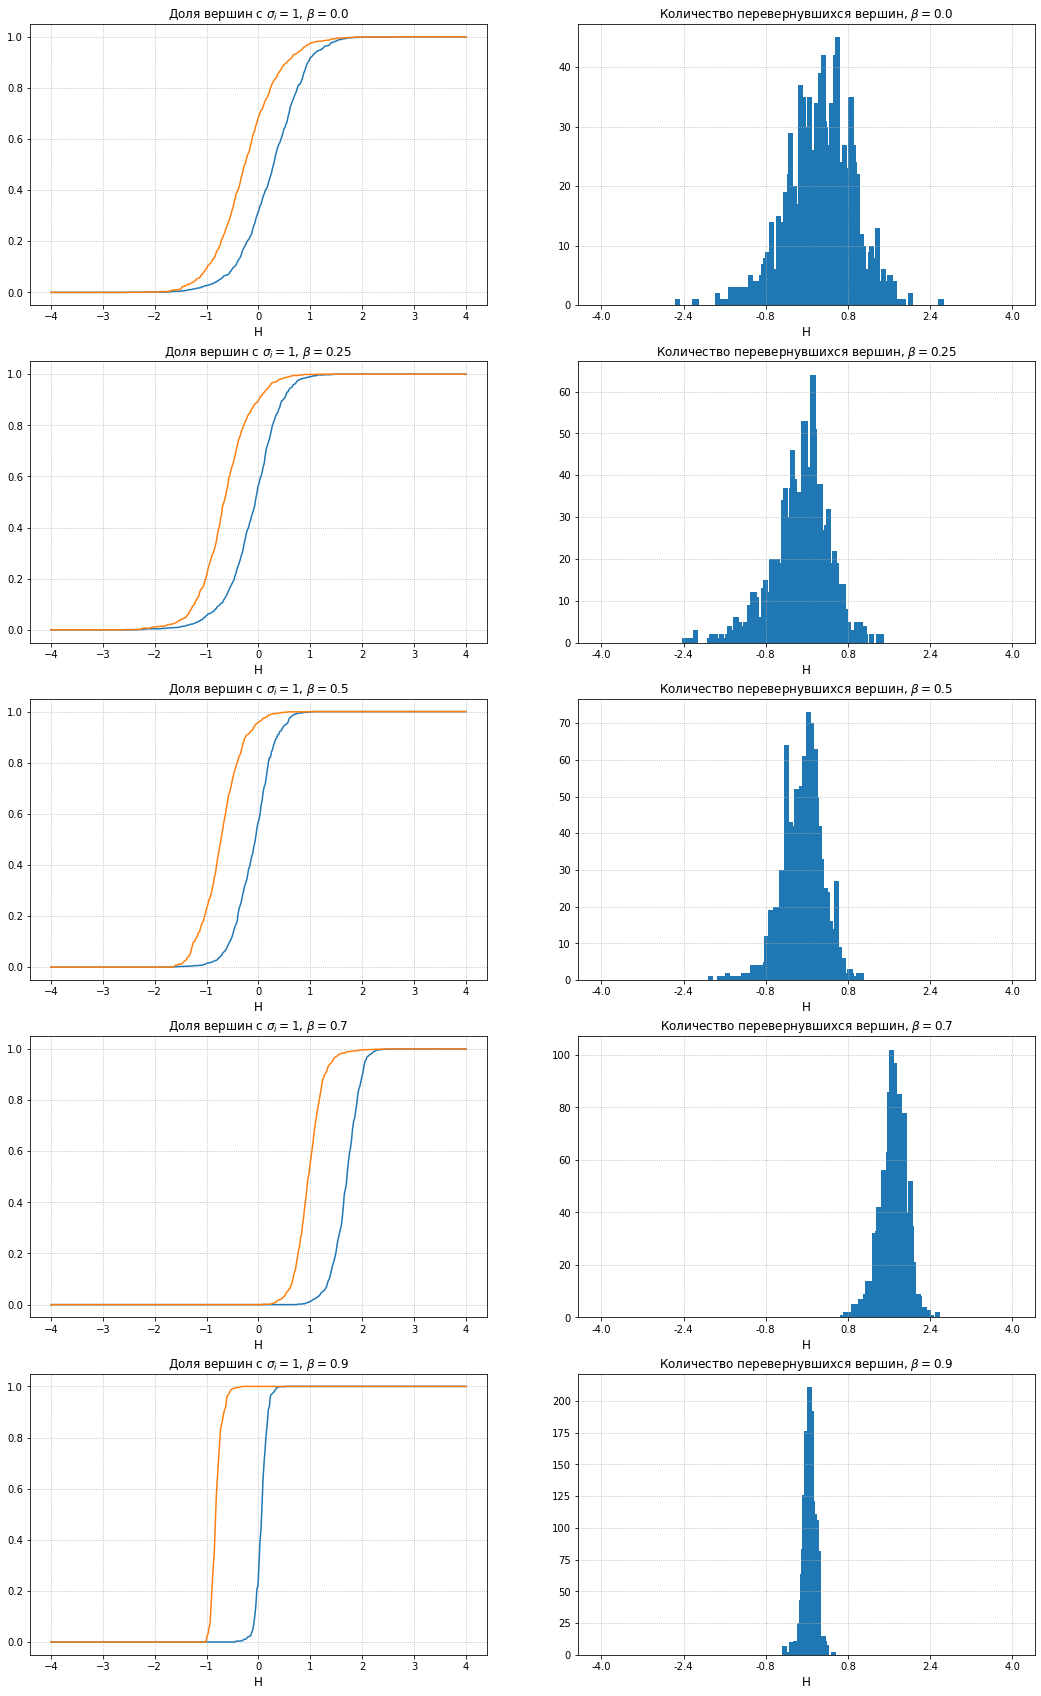

In [30]:
plt.figure(figsize=(18, 30))
for index, beta in tqdm(enumerate(beta_grid)):
    low_to_high, high_to_low, hubs_low, hubs_high = G_circle.get_trajectories(J, H_grid, beta, 
                                                                            'multivariate_norm', True,
                                                                            matrix='simple')
    plot_trajectories(index, beta, H_grid, low_to_high, high_to_low, hubs_low, hubs_high)

Здесь ничего примечательного не наблюдается, кроме очевидного наблюдения, что переходы становятся более резкими, а столбики на гистограмме — более тесно локализованными. Это происходит, конечно, из-за уменьшения разницы между отдельными соседними полями $H_i$.

## Бинарное дерево

In [31]:
N = 5000
J = 1
G_tree = RandomGraph(N, topology='binary_tree')

5it [23:43, 284.72s/it]


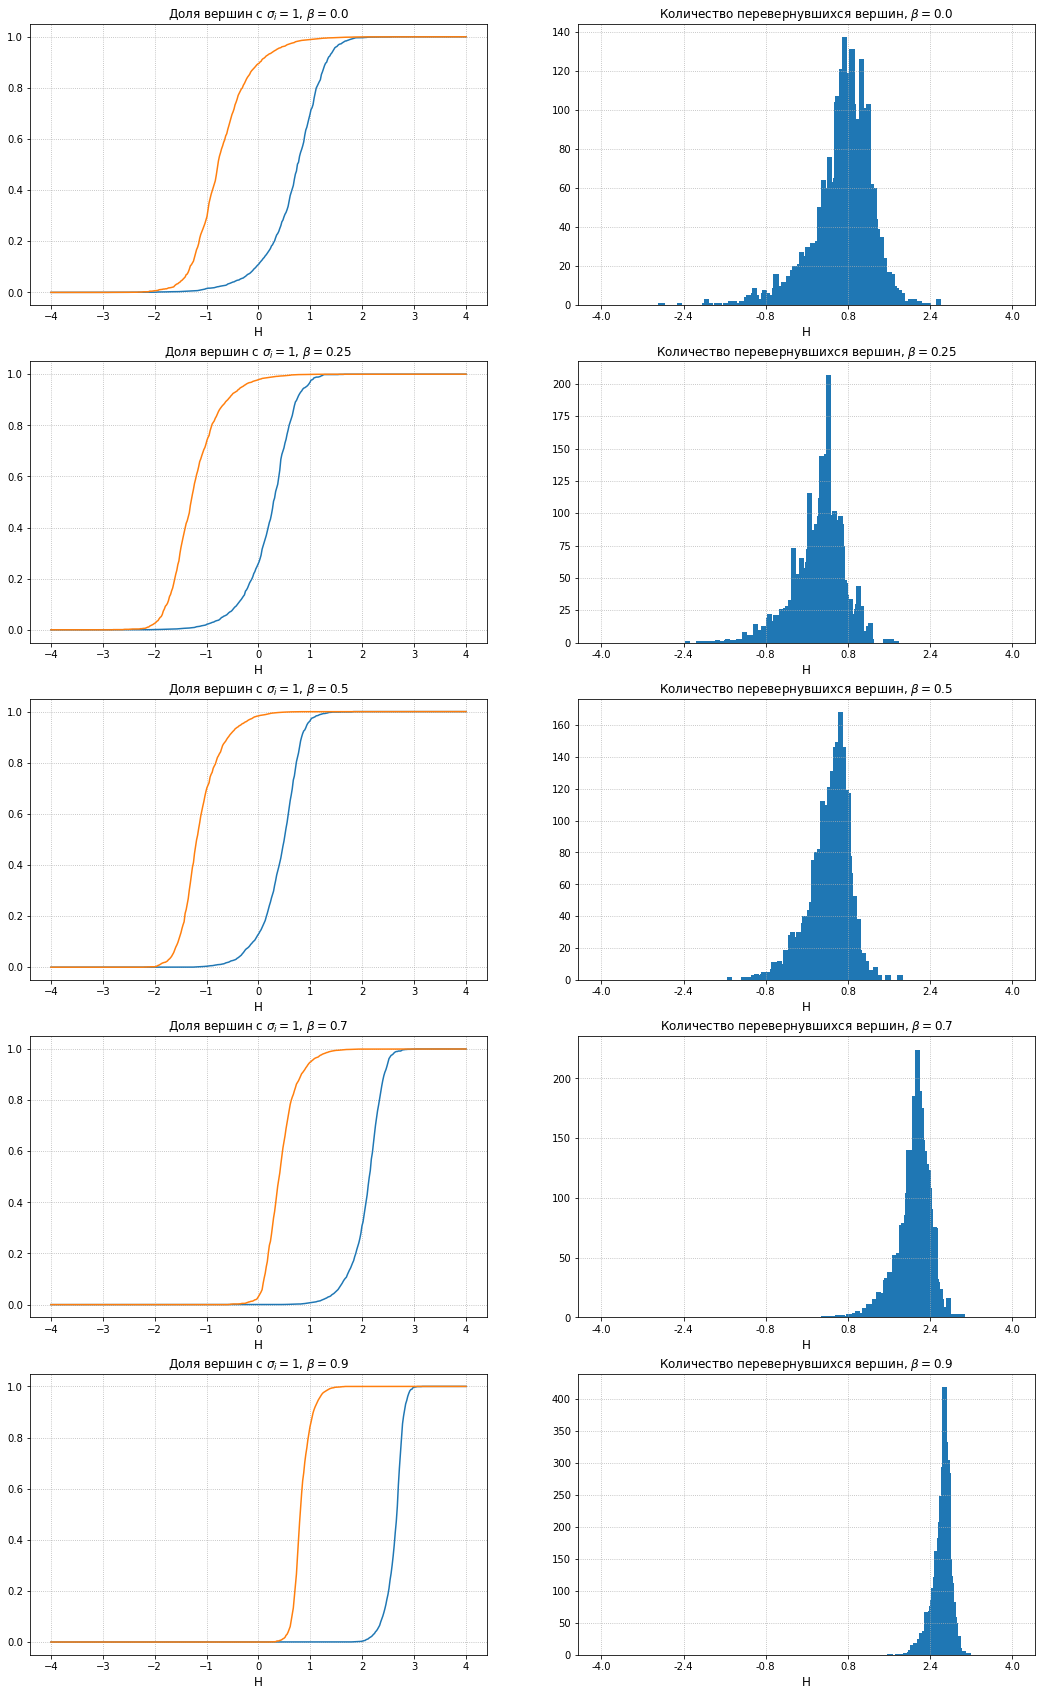

In [32]:
plt.figure(figsize=(18, 30))
for index, beta in tqdm(enumerate(beta_grid)):
    low_to_high, high_to_low, hubs_low, hubs_high = G_tree.get_trajectories(J, H_grid, beta, 
                                                                            'multivariate_norm', True,
                                                                            matrix='simple')
    plot_trajectories(index, beta, H_grid, low_to_high, high_to_low, hubs_low, hubs_high)

Ситуация та же, что и для кольца, только, пожалуй, ещё более слабо выражена.

## Регулярный граф

In [22]:
J = 0.5
G_regular = RandomGraph(N, topology='regular')

5it [26:40, 320.11s/it]


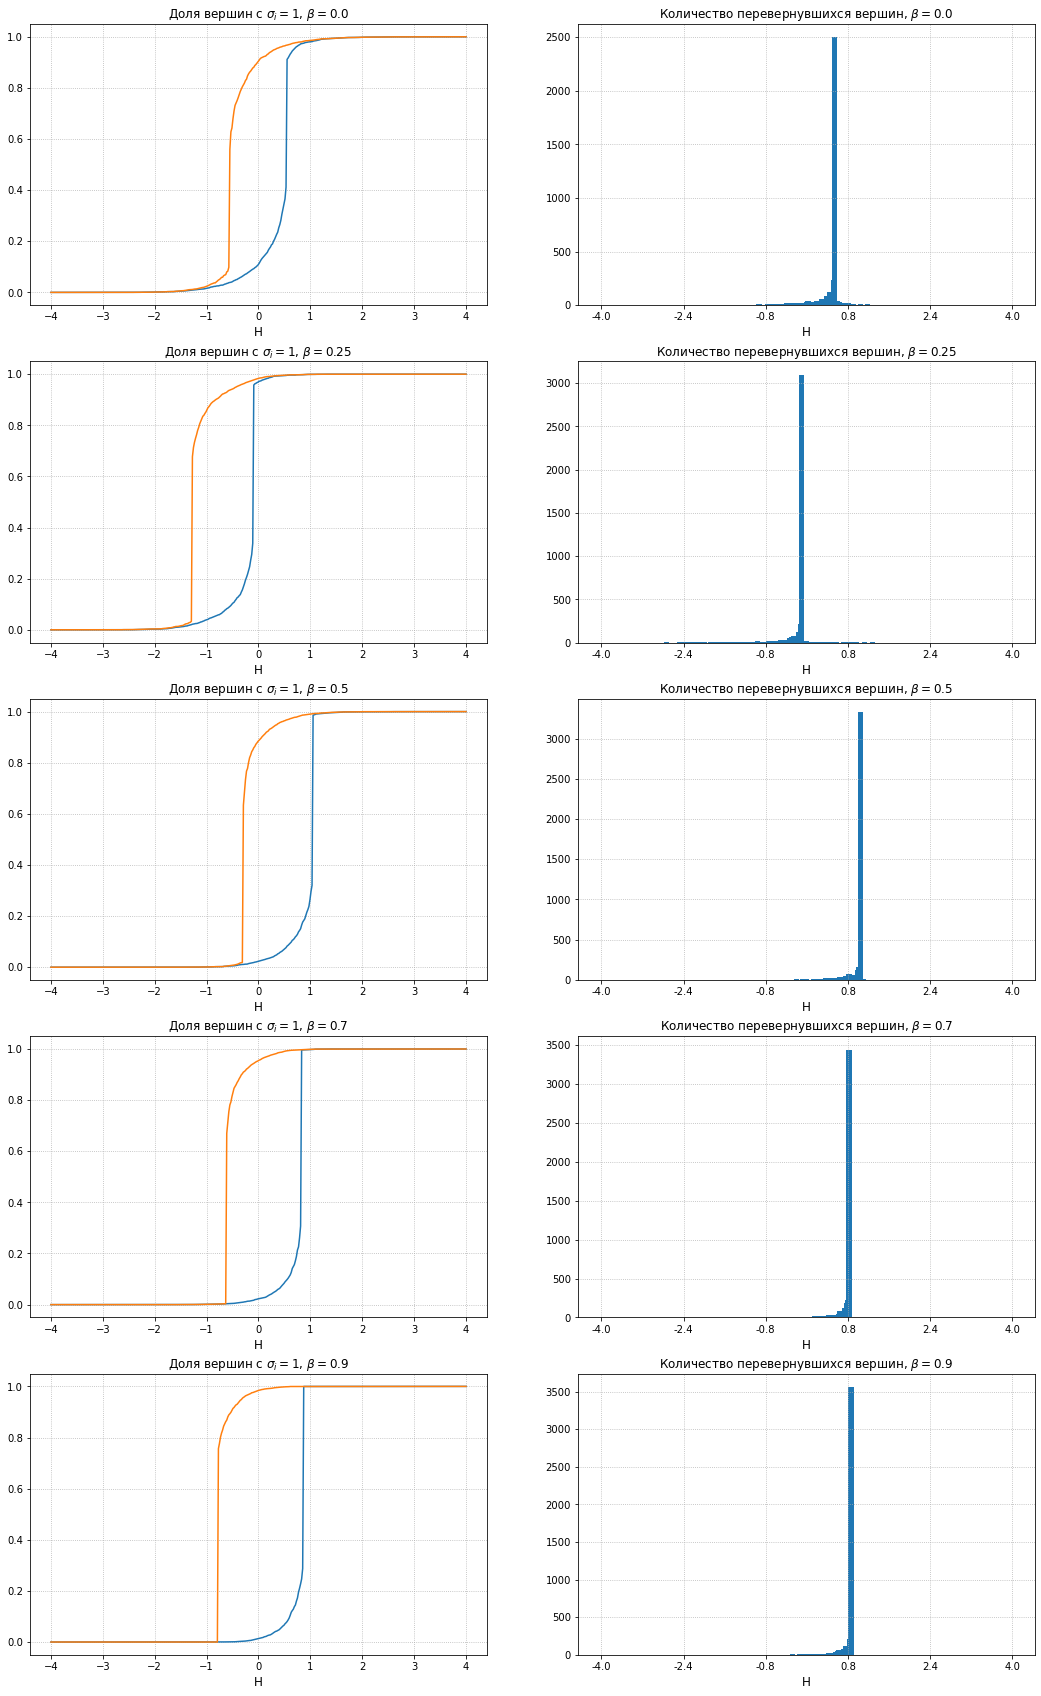

In [23]:
plt.figure(figsize=(18, 30))
for index, beta in tqdm(enumerate(beta_grid)):
    low_to_high, high_to_low, hubs_low, hubs_high = G_regular.get_trajectories(J, H_grid, beta, 
                                                                               'multivariate_norm', True,
                                                                               matrix='simple')
    plot_trajectories(index, beta, H_grid, low_to_high, high_to_low, hubs_low, hubs_high)

Здесь заметно увеличение высоты пика (максимальной лавины): от $2500$ вершин при $\beta = 0$ до более чем $3500$ при $\beta = 0{,}9$. Графики и гистограммы очень напоминают их в случае пуассоновского графа, что, по большому счёту, логично: плотность пуассоновского распределения очень быстро убывает, из-за чего он вполне близок к регулярному.